In [6]:
%matplotlib ipympl
import matplotlib.pyplot as plt

# Real quantum computer
- https://github.com/Qiskit/qiskit-ibmq-provider


In [1]:
import qiskit as q
print(q.__qiskit_version__)


{'qiskit-terra': '0.23.3', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.42.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}


First get your key from https://quantum-computing.ibm.com/account, 
and save it in .env as QISKIT_IBM_TOKEN

In [22]:
# Load PI Key and save account credentials
import os
from dotenv import load_dotenv
load_dotenv() # take environment variables from .env.
api_key = os.environ.get("QISKIT_IBM_TOKEN")
assert api_key is not None
q.IBMQ.ibmq.save_account(api_key)

configrc.store_credentials:WARNING:2023-05-05 16:56:49,572: Credentials already present. Set overwrite=True to overwrite.


stored_account:{'token': '48d331fe949d7ae5827576b0d1ab4aaafaab33d9bb49cc959732842daab22600543760613aa9f022a0d0dc380d06a751fc8952039ccbca1f9f2c8f86c1deef09', 'url': 'https://auth.quantum-computing.ibm.com/api'}


In [51]:
for p in q.IBMQ.ibmq.providers():
    print("==services==")
    for s in p.services():
        print(s)
    print("==backends==")
    for b in p.backends():
        print(f"{b.name()}, {b.status().status_msg}, {b.status().pending_jobs}")
    print("==jobs==")
    for j in p.runtime.jobs():
        print(f"{j.job_id()}, {j.backend()}, {j.status()}")



==services==
backend
runtime
==backends==
ibmq_qasm_simulator, active, 0
ibmq_lima, active, 42
ibmq_belem, active, 17
ibmq_quito, active, 22
simulator_statevector, active, 0
simulator_mps, active, 0
simulator_extended_stabilizer, active, 0
simulator_stabilizer, active, 0
ibmq_jakarta, dedicated, 134
ibmq_manila, active, 43
ibm_lagos, active, 42
ibm_nairobi, active, 132
ibm_perth, active, 311
==jobs==
chahnqpmfb1ddb4f6oeg, ibmq_belem, JobStatus.CANCELLED
chahnghmfb1ddb4f6j0g, ibmq_qasm_simulator, JobStatus.DONE
chahnd8dickn60ippvg0, ibmq_qasm_simulator, JobStatus.DONE
chahnbgo51arsocq8qp0, ibmq_qasm_simulator, JobStatus.DONE
chahmuodickn60ippo4g, ibmq_qasm_simulator, JobStatus.DONE
chagkago51arsocpn2ig, ibmq_qasm_simulator, JobStatus.DONE
chagfip76h9ab2bq4jlg, ibmq_qasm_simulator, JobStatus.DONE


In [39]:
provider = q.IBMQ.ibmq.load_account()


ibmqfactory.load_account:WARNING:2023-05-05 17:05:59,136: Credentials are already in use. The existing account in the session will be replaced.


In [47]:
# Select the backend
# here we use a quantum computer simulator - with no access to underlying vectors
# init quantum computer simulator
#backend = provider.get_backend('ibmq_qasm_simulator')
backend = provider.get_backend('ibmq_belem') # REAL quantum computer

In [41]:
# init circuit
circuit = q.QuantumCircuit(2,2) #qbits, classic measure bits

# build circuit
circuit.h(0) #Hadamard line 0
circuit.x(0) #Pauly X (invert |0> and |1> )
circuit.cx(0,1) #CNOT 0-1
circuit.h(1) #Hadamard line 1
#  add measure of qbit line 0 & 1 to classic lines 0 & 1 - to enable counts
circuit.measure_active()

In [42]:
# display circuit in text format
print(circuit.draw(output='text'))

           ┌───┐┌───┐           ░ ┌─┐   
      q_0: ┤ H ├┤ X ├──■────────░─┤M├───
           └───┘└───┘┌─┴─┐┌───┐ ░ └╥┘┌─┐
      q_1: ──────────┤ X ├┤ H ├─░──╫─┤M├
                     └───┘└───┘ ░  ║ └╥┘
      c: 2/════════════════════════╬══╬═
                                   ║  ║ 
measure: 2/════════════════════════╩══╩═
                                   0  1 


In [48]:
# run circuit on simulator
job = q.execute(circuit, backend, shots=1)

# monitor job submission
from qiskit.tools.monitor import job_monitor
job_monitor(job,interval=10)

# wait for results
result = job.result()

# count measures
counts = result.get_counts(circuit)
print(f"Counts:{counts}")

Job Status: job has been cancelled


IBMQJobInvalidStateError: 'Unable to retrieve result for job chahnqpmfb1ddb4f6oeg. Job was cancelled.'

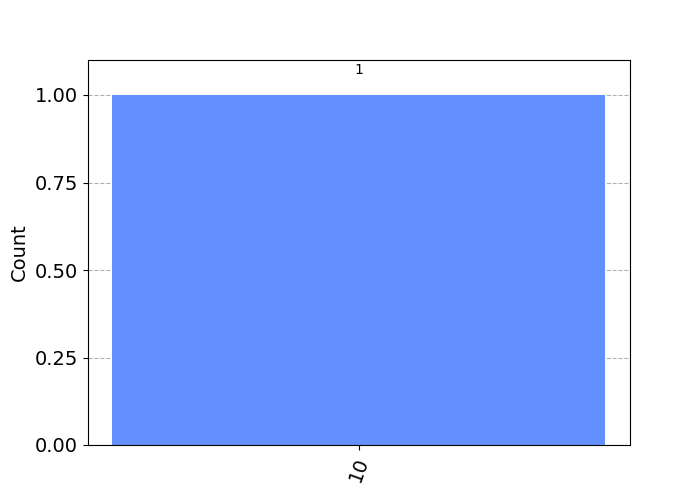

In [8]:
%matplotlib ipympl
import matplotlib.pyplot as plt
# display results
q.visualization.plot_histogram(counts)
plt.show()